In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%run ../customer_personality_analysis/utils/pandas_explorer.py

## Data load and first visualization

In [2]:
path = '../customer_personality_analysis/data/cleaned_data.csv'
df = pd.read_csv(path).drop(columns=['Unnamed: 0'])
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Tenure_Months,Age,Total_bought,Total_purchases
0,1957,Graduation,Uncommitted,58138.0,0,0,58,635,88,546,...,0,0,0,0,0,1,21,57,1617,25
1,1954,Graduation,Uncommitted,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,0,3,60,27,6
2,1965,Graduation,Committed,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,0,10,49,776,21
3,1984,Graduation,Committed,26646.0,1,0,26,11,4,20,...,0,0,0,0,0,0,4,30,53,8
4,1981,PhD,Committed,58293.0,1,0,94,173,43,118,...,0,0,0,0,0,0,5,33,422,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,1967,Graduation,Committed,61223.0,0,1,46,709,43,182,...,0,0,0,0,0,0,12,47,1341,18
2201,1946,PhD,Committed,64014.0,2,1,56,406,0,30,...,0,0,1,0,0,0,0,68,444,22
2202,1981,Graduation,Uncommitted,56981.0,0,0,91,908,48,217,...,1,0,0,0,0,0,5,33,1241,19
2203,1956,Master,Committed,69245.0,0,1,8,428,30,214,...,0,0,0,0,0,0,5,58,843,23


## Feature engineering

## Creating new features

In [3]:
# Creating 'Age' column (Customers' ages were calculated using 2014 as the reference year, as it was the year when the dataset was shared)
df['Age'] = 2014 - df['Year_Birth']


In [4]:
# Creating a function to labelice features
def categorice_feature(data, feature, labels):
    if len(labels) == 3:
        Q1,Q3 = data[feature].quantile([0.25, 0.75])
        # Applying labels
        categories = data[feature].apply(lambda x: labels[0] if x <= Q1 else (labels[1] if x <= Q3 else labels[2]))
    elif len(labels) == 4:
        Q1, Q2, Q3 = data[feature].quantile([0.25, 0.50, 0.75])
        categories = data[feature].apply(lambda x : labels[0] if x <= Q1 else (labels[1] if x <= Q2 else labels[2] if x <= Q3 else labels[3]))
    return categories

In [5]:

# Groupoing 'Marital_status' labels to get only 2 categories
marital_status = {
    'Married': 'Committed',
    'Together': 'Committed',
    'Single': 'Uncommitted',
    'Divorced': 'Uncommitted',
    'Widow': 'Uncommitted'
}
df['Marital_Status'] = df['Marital_Status'].replace(marital_status)



# # Creating 'Recency_level' feature
# labels.reverse()
# df['Recency_level'] = categorice_feature(
#     data=df,
#     feature='Recency',
#     labels=labels
# )

# # Creating 'Total_products' feature
df['Total_bought'] = df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis=1)


# Creating 'Cmp_Accepted' feature
df['Cmp_Accepted'] = df[[
    'AcceptedCmp3',
    'AcceptedCmp4',
    'AcceptedCmp5',
    'AcceptedCmp1',
    'AcceptedCmp2'
]].sum(axis=1)


# Creating 'Total_purchases' feature
df['Total_purchases'] = df[[
    'NumDealsPurchases',
    'NumWebPurchases',
    'NumCatalogPurchases',
    'NumStorePurchases'
]].sum(axis=1)


# df.head()

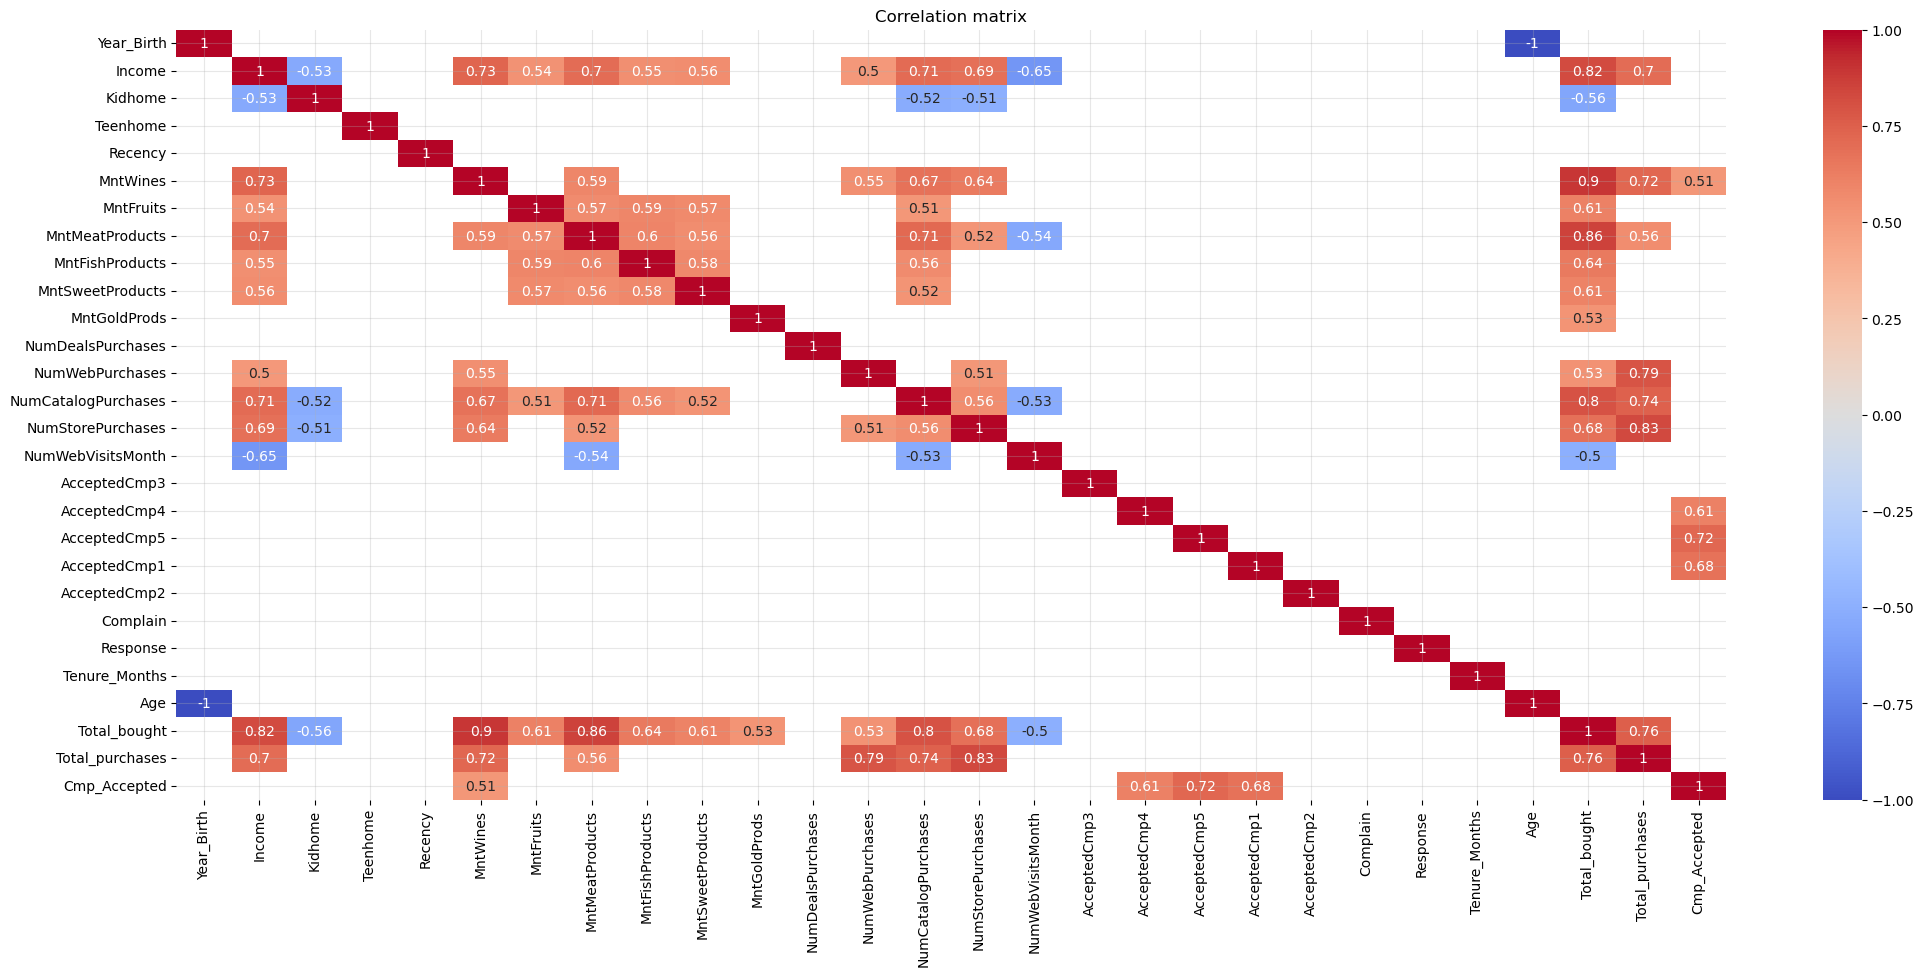

In [6]:
# Creating correlation matrix
corr_matrix = df.select_dtypes(include=np.number).corr()

# stablishing threshold
threshold = 0.5

# filtering correlation matrix based on the threshold
filtered_corr_matirx = corr_matrix.where(corr_matrix.abs() >= threshold)

plt.figure(figsize=(25,10))
sns.heatmap(
    data=filtered_corr_matirx,
    annot=True,
    cmap='coolwarm'
)
plt.grid(alpha=0.3)
plt.title('Correlation matrix')
plt.show()


In [7]:
corr_matrix['Income'].sort_values(ascending=False)


Income                 1.000000
Total_bought           0.823770
MntWines               0.730495
NumCatalogPurchases    0.710057
MntMeatProducts        0.702500
Total_purchases        0.701568
NumStorePurchases      0.687206
MntSweetProducts       0.555601
MntFishProducts        0.551758
MntFruits              0.537920
NumWebPurchases        0.503184
MntGoldProds           0.417653
AcceptedCmp5           0.416386
Cmp_Accepted           0.388247
AcceptedCmp1           0.345242
AcceptedCmp4           0.233267
Age                    0.212625
Response               0.174902
AcceptedCmp2           0.110210
Teenhome               0.042483
Recency                0.006716
AcceptedCmp3          -0.011181
Tenure_Months         -0.025296
Complain              -0.027488
NumDealsPurchases     -0.132427
Year_Birth            -0.212625
Kidhome               -0.531699
NumWebVisitsMonth     -0.648306
Name: Income, dtype: float64

# Insights from Correlations with the Variable `Income`

The table below highlights the relationships between `Income` and other variables in the dataset. Key takeaways from the analysis are as follows:

#### Positive Correlations:
1. **Total_bought (0.833)**: This is the strongest correlation, indicating that higher income is strongly associated with higher total spending across categories.
2. **NumCatalogPurchases (0.738)**: A high income correlates with a greater number of purchases made through catalogs, suggesting that wealthier customers might prefer this shopping method.
3. **MntWines (0.736)** and **MntMeatProducts (0.725)**: Both product categories are highly correlated with income, implying that higher earners tend to spend more on premium products like wine and meat.
4. **NumStorePurchases (0.687)**: Higher income also relates to an increased number of purchases in physical stores, showing a preference for in-person shopping among wealthier customers.
5. **MntFishProducts (0.556)**, **MntSweetProducts (0.555)**, and **MntFruits (0.542)**: Spending on these product categories also increases with income but is slightly less pronounced compared to wines and meats.

#### Moderate Positive Correlations:
- **NumWebPurchases (0.525)**: Suggests that online shopping activity increases with income.
- **MntGoldProds (0.441)**: Indicates a moderate association with spending on gold products, likely representing luxury items.
- **AcceptedCmp5 (0.420)** and **AcceptedCmp1 (0.348)**: Higher-income customers are more likely to respond positively to specific marketing campaigns.

#### Weak Positive Correlations:
- **Age (0.211)**: Older individuals tend to have slightly higher income, reflecting potential career progression.
- **Response (0.175)**: There is a slight increase in overall marketing campaign responsiveness with income.

#### Negative Correlations:
1. **NumWebVisitsMonth (-0.653)**: Customers with higher income visit the website less frequently, possibly due to time constraints or preference for direct purchases.
2. **Kidhome (-0.542)**: Higher income is inversely related to the number of children at home, potentially due to lifestyle choices or resource allocation.
3. **Year_Birth (-0.211)**: Younger individuals tend to have lower income, reflecting early career stages.
4. **NumDealsPurchases (-0.116)**: Wealthier customers are less likely to participate in deals or promotions, suggesting a preference for quality over cost savings.

#### Insignificant Correlations:
- Variables like **Recency (0.006)**, **AcceptedCmp3 (-0.010)**, and **Complain (-0.029)** show negligible relationships with income.

### Conclusion:
The analysis indicates that income is a strong predictor of purchasing behaviors and preferences. High earners are inclined to spend more on premium products and participate in specific shopping methods (catalog and store). In contrast, they are less likely to seek promotions or engage frequently in online browsing.

______

# Insights from Correlations with the Variable `Total_bought`

The analysis below focuses on the correlations between `Total_bought` (representing the total purchases) and other variables in the dataset. Key insights are summarized as follows:

#### Strong Positive Correlations:
1. **MntWines (0.899)**: Spending on wine is most strongly correlated with total purchases, highlighting its dominance as a key product category.
2. **MntMeatProducts (0.862)**: Meat products also significantly contribute to overall purchases, making it another primary driver of total spending.
3. **Income (0.834)**: Higher income is closely linked with higher total purchases, underscoring the influence of financial capability on overall buying behavior.
4. **NumCatalogPurchases (0.805)**: Catalog purchases are strongly tied to total purchases, suggesting their popularity among high-value customers.

#### Moderate Positive Correlations:
- **NumStorePurchases (0.686)**: Physical store purchases contribute substantially to total purchases, though less strongly than catalog purchases.
- **MntFishProducts (0.646)**, **MntFruits (0.617)**, and **MntSweetProducts (0.617)**: These categories show moderate correlations, indicating that they form significant components of the overall spending.
- **NumWebPurchases (0.562)**: Online purchases play a notable but secondary role in total purchases.
- **MntGoldProds (0.541)**: Spending on gold products contributes moderately to the total.

#### Weak Positive Correlations:
- **AcceptedCmp5 (0.471)** and **AcceptedCmp1 (0.384)**: Customers who engage with specific campaigns tend to have slightly higher total purchases.
- **Response (0.267)**: A weak positive relationship exists between responsiveness to campaigns and total purchases.
- **Tenure_Months (0.155)** and **Tenure_level (0.153)**: Slight increases in total purchases are observed with higher tenure.

#### Negative Correlations:
1. **Kidhome (-0.561)** and **Teenhome (-0.138)**: Households with children tend to have lower total purchases, likely due to budgetary constraints or different spending priorities.
2. **NumWebVisitsMonth (-0.516)**: Higher frequency of website visits negatively correlates with total purchases, suggesting that frequent visitors may be browsing rather than buying.
3. **NumDealsPurchases (-0.082)**: Customers who focus on deals contribute less to total purchases, indicating a potential preference for quality over cost savings.

#### Insignificant Correlations:
- Variables like **Recency (0.021)** and **AcceptedCmp3 (0.055)** have negligible relationships with total purchases.
- **Complain (-0.034)**: Complaints are minimally related to total purchases.

### Conclusion:
The strongest drivers of total purchases are spending on wines, meat products, and catalog purchases, alongside income. Conversely, households with children and frequent website visitors tend to have lower total purchase values. These insights can guide marketing strategies, product focus, and customer engagement efforts.


In [8]:
df.to_csv('../customer_personality_analysis/data/cleaned_data.csv')